In [803]:
import osmnx as ox
import networkx as nx
import pandas as pd
pd.set_option('display.max_columns', None)
from shapely.geometry import Point

import json
import geopandas as gpd
import matplotlib.pyplot as plt
import GOSTnets as gn
import numpy as np

In [804]:
limaMapa = gpd.read_file("../Turismo/shapes/peru.shp")

<AxesSubplot:>

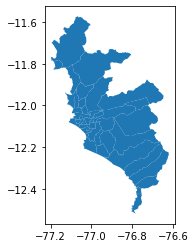

In [1112]:
cond = limaMapa['provincia'] == 'LIMA'
limaMapa[cond].plot()

In [1113]:
lima_distritos = np.sort(limaMapa[cond]['distrito'].unique())
print(len(lima_distritos))
lima_distritos

43


array(['ANCON', 'ATE', 'BARRANCO', 'BREÑA', 'CARABAYLLO', 'CHACLACAYO',
       'CHORRILLOS', 'CIENEGUILLA', 'COMAS', 'EL AGUSTINO',
       'INDEPENDENCIA', 'JESUS MARIA', 'LA MOLINA', 'LA VICTORIA', 'LIMA',
       'LINCE', 'LOS OLIVOS', 'LURIGANCHO', 'LURIN', 'MAGDALENA DEL MAR',
       'MIRAFLORES', 'PACHACAMAC', 'PUCUSANA', 'PUEBLO LIBRE',
       'PUENTE PIEDRA', 'PUNTA HERMOSA', 'PUNTA NEGRA', 'RIMAC',
       'SAN BARTOLO', 'SAN BORJA', 'SAN ISIDRO', 'SAN JUAN DE LURIGANCHO',
       'SAN JUAN DE MIRAFLORES', 'SAN LUIS', 'SAN MARTIN DE PORRES',
       'SAN MIGUEL', 'SANTA ANITA', 'SANTA MARIA DEL MAR', 'SANTA ROSA',
       'SANTIAGO DE SURCO', 'SURQUILLO', 'VILLA EL SALVADOR',
       'VILLA MARIA DEL TRIUNFO'], dtype=object)

In [1088]:
import time
start = time.time()
print(start)

1629072432.6603239


<AxesSubplot:>

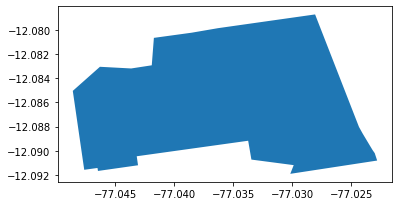

In [1114]:
province_name = 'LIMA'
district_name = 'LINCE'
cond = (limaMapa['distrito'] == district_name) & (limaMapa['provincia'] == province_name)
distrito = limaMapa[cond].copy()
distrito.plot()

In [1115]:
distrito

,iddpto,departamen,idprov,provincia,iddist,distrito,capital,codccpp,area,fuente,geometry
1311,15,LIMA,1501,LIMA,150116,LINCE,LINCE,0001,1,INEI,"POLYGON ((-77.02807 -12.07871, -77.02435 -12.0..."


In [1116]:
from shapely import geometry
from shapely import wkt

# polygon = wkt.loads(distrito.geometry)
polygon = distrito.geometry.values[0]
type(polygon)
# polygon

shapely.geometry.polygon.Polygon

In [1117]:
#Global vars
place_name = "{}, Lima".format(district_name.lower())
print(place_name)
result = 1

lince, Lima


In [1118]:
%%time
#Getting graph from OSM - Polygon
graph = ox.graph.graph_from_polygon(polygon, network_type='drive')
nodes, edges = ox.graph_to_gdfs(graph)
print(nx.info(graph))

#Getting graph from OSM


# graph = ox.graph_from_place(place_name, which_result=result, network_type='drive')
# nodes, edges = ox.graph_to_gdfs(graph)
# print(nx.info(graph))

Name: 
Type: MultiDiGraph
Number of nodes: 371
Number of edges: 686
Average in degree:   1.8491
Average out degree:   1.8491
CPU times: user 2.69 s, sys: 118 ms, total: 2.8 s
Wall time: 12.4 s


In [1119]:
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
108064601,-12.089762,-77.033624,3,NaN,NaN,POINT (-77.03362 -12.08976)
108064608,-12.089013,-77.033738,4,traffic_signals,NaN,POINT (-77.03374 -12.08901)
108064612,-12.088071,-77.033871,4,traffic_signals,NaN,POINT (-77.03387 -12.08807)
108064614,-12.086929,-77.034047,4,traffic_signals,NaN,POINT (-77.03405 -12.08693)
108064618,-12.086281,-77.034130,3,NaN,NaN,POINT (-77.03413 -12.08628)


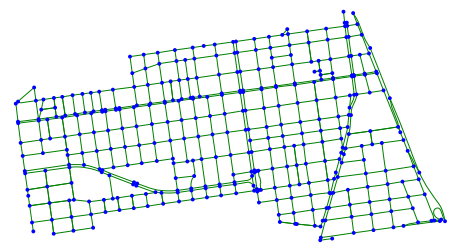

CPU times: user 379 ms, sys: 157 ms, total: 536 ms
Wall time: 284 ms


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [1120]:
%%time
ox.plot.plot_graph(graph, bgcolor='white', node_color='blue', edge_color='green')

In [1121]:
%%time
#Getting amenities from OSM
# amenities = ox.geometries_from_place(place_name, which_result=result ,tags={'amenity':True} )
amenities = ox.geometries_from_polygon(polygon ,tags={'amenity':True} )



amenities['isPoint'] = amenities.apply(lambda x: type(x.geometry) is Point , axis=1)
amenities.rename(columns={'geometry':'geometry_polygon'}, inplace=True)
amenities['geometry'] = amenities.apply(lambda x: x['geometry_polygon'].centroid, axis=1)
amenities.set_geometry('geometry')
amenities.set_index('osmid', inplace=True)
# amenities.head()

CPU times: user 1 s, sys: 27.9 ms, total: 1.03 s
Wall time: 4.5 s


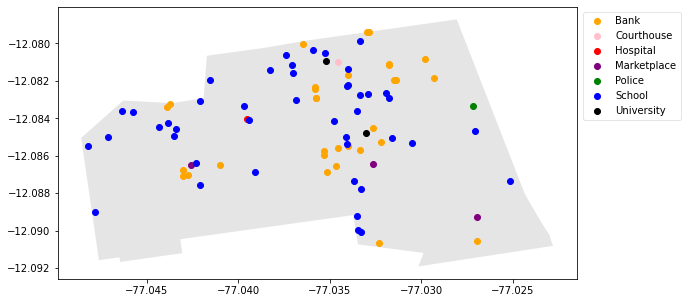

In [1236]:
fig, ax = plt.subplots(figsize=(15,5))

colors_dist = {
        'bank_dist':'orange',
        'courthouse_dist': 'pink',
        'hospital_dist': 'red',
        'marketplace_dist': 'purple',
        'police_dist': 'green',
        'school_dist': 'blue',
        'university_dist': 'black'
    }
colors_dist = {
        'bank':'orange',
        'courthouse': 'pink',
        'hospital': 'red',
        'marketplace': 'purple',
        'police': 'green',
        'school': 'blue',
        'university': 'black'
    }

# amenities['color'] = amenities.apply(lambda x: colors_dist.get(x['amenity']+'_dist'), axis=1 )

# amenities_filter = ['bank','courthouse','hospital','marketplace', 'police','school','university']
# cond = amenities['amenity'].isin(amenities_filter)

distrito.plot(ax=ax, color='gray', alpha=0.2)
# ax = ox.plot.plot_graph(graph, bgcolor='white', node_color='blue', edge_color='green', ax=ax)

colors = colors_dist.values()

cond = amenities['amenity'] == 'bank'
ax = amenities[cond].plot( ax=ax, color='orange', legend=True, label='Bank')
cond = amenities['amenity'] == 'courthouse'
ax = amenities[cond].plot( ax=ax, color='pink', legend=True, label='Courthouse' )
cond = amenities['amenity'] == 'hospital'
ax = amenities[cond].plot( ax=ax, color='red', legend=True, label='Hospital' )
cond = amenities['amenity'] == 'marketplace'
ax = amenities[cond].plot( ax=ax, color='purple', legend=True, label='Marketplace' )
cond = amenities['amenity'] == 'police'
ax = amenities[cond].plot( ax=ax, color='green', legend=True, label='Police' )
cond = amenities['amenity'] == 'school'
ax = amenities[cond].plot( ax=ax, color='blue', legend=True, label='School' )
cond = amenities['amenity'] == 'university'
ax = amenities[cond].plot( ax=ax, color='black', legend=True, label='University' )

# ax.get_legend()
ax.legend(bbox_to_anchor=(1.21, 1), facecolor='white', framealpha=0.5)

fig.savefig("amenities_lince.png", dpi=300, bbox_inches='tight')

In [1185]:
list(colors_dist.keys())

['bank',
 'courthouse',
 'hospital',
 'marketplace',
 'police',
 'school',
 'university']

In [1165]:
# amenities.head()
# amenities.apply(lambda x: colors_dist.get(x['amenity']+'_dist'), axis=1 )
colors_dist.values()

dict_values(['orange', 'pink', 'red', 'purple', 'green', 'blue', 'black'])

In [1097]:
_amenity = 'school'
amenities_as_points = amenities[amenities['amenity'] == _amenity] 
columns = ['unique_id', 'element_type', 'geometry_polygon', 
               'amenity', 'name', 'geometry']

amenities_as_points[columns].head()

,unique_id,element_type,geometry_polygon,amenity,name,geometry
osmid,,,,,,
4101468690,node/4101468690,node,POINT (-77.12831 -11.89895),school,NaN,POINT (-77.12831 -11.89895)
4281454391,node/4281454391,node,POINT (-77.14275 -11.87225),school,Héroe del Pacífico,POINT (-77.14275 -11.87225)
4506496992,node/4506496992,node,POINT (-77.12752 -11.88897),school,Liceo Naval Capitán de Corbeta Manuel Clavero ...,POINT (-77.12752 -11.88897)
4666676889,node/4666676889,node,POINT (-77.13435 -11.82730),school,IE AH KEYKO,POINT (-77.13435 -11.82730)
4692849992,node/4692849992,node,POINT (-77.12721 -11.84851),school,IEP SEMILLITAS DE JESÚS,POINT (-77.12721 -11.84851)


<AxesSubplot:>

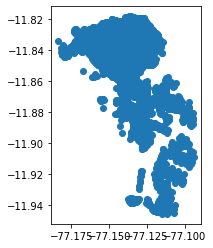

In [1098]:
fig, ax = plt.subplots()
nodes.plot(ax=ax)

In [1099]:
%%time
def process_amenities(_amenity):

    amenities_as_points = amenities[amenities['amenity'] == _amenity] 
    print("amenities_as_points --> {}".format(amenities_as_points.shape) )
    
    if amenities_as_points.shape[0] == 0:
        return pd.DataFrame()

    ##adding shortest amenity point for all graph nodes
    nodes_amenity = gn.pandana_snap_points( nodes , amenities_as_points ) 

    amenityid = "{}_amenity".format(_amenity)
    amenitydist = "{}_amenity_dist".format(_amenity)
    print(amenityid, amenitydist)

    nodes_amenity.rename(columns={'NN':amenityid, 'NN_dist': amenitydist}, inplace=True)

#     nodes_amenity.head()
    print("nodes_amenity --> {}".format(nodes_amenity.shape))

    ##nearest node for all amenity points
    amenities_as_points2 = gn.pandana_snap(graph, amenities_as_points) 
    print("amenities_as_points2 --> {}".format(amenities_as_points2.shape))

    ######
    columns = ['unique_id', 'element_type', 'geometry_polygon', 
               'amenity', 'name', 'geometry', 'NN', 'NN_dist']

    nodes_amenity2 = nodes_amenity.reset_index().merge(amenities_as_points2[columns], 
                                         how='left', 
                                         left_on=amenityid, 
                                         right_index=True)
    node = "{}_node".format(_amenity)
    nodedist = "{}_node_dist".format(_amenity)
    nodes_amenity2.rename(columns={'NN':node, 'NN_dist': nodedist}, inplace=True)
    print("nodes_amenity2 --> {}".format(nodes_amenity2.shape))
    
    # nodes_amenity2.head()
    #####
    def shortest_path (G, source, target, weight='length'):
        distance = np.NaN
        try:
            distance = nx.shortest_path_length(G, source, target, weight)
        except Exception as e:
            distance = np.NaN
        return distance

    nodedist = "{}_dist".format(_amenity)
    print("Calculating shortest path distance:")
    nodes_amenity2[nodedist] = nodes_amenity2.apply(lambda x:
                                                        shortest_path(graph, x['osmid'], x[node], weight='length'),
                                                        axis=1
                                                       )
    #####
    cols = ['osmid', 'geometry_x', amenityid, node, nodedist ]
#     nodes_amenity2[cols].head()
    return nodes_amenity2

CPU times: user 45 µs, sys: 0 ns, total: 45 µs
Wall time: 49.8 µs


In [1100]:
# ray.shutdown()

In [1101]:
%%time
import ray
import time

ray.shutdown()
ray.init()
@ray.remote
def f(i):
    time.sleep(1)
    return process_amenities(i)

amenities_filter = ['bank','courthouse','hospital','marketplace', 'police','school','university']

futures = [f.remote(i) for i in amenities_filter]
# print(ray.get(futures))
# ray.get(futures[0])
futures

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/ray/node.py:890: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2021-08-15_19-08-03_073493_3773/logs/redis-shard_0.err' mode='a' encoding='utf-8'>
  self.start_redis()
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/ray/node.py:890: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2021-08-15_19-08-03_073493_3773/logs/redis-shard_0.out' mode='a' encoding='utf-8'>
  self.start_redis()
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/ray/node.py:890: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2021-08-15_19-08-03_073493_3773/logs/redis.err' mode='a' encoding='utf-8'>
  self.start_redis()
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/ray/node.py:890: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2021-08-15_19-08-03_073493_3773/logs/redis.out' mode='a' encoding='utf-8'>
  self.start_redis()
/home/leibnitz.r

CPU times: user 866 ms, sys: 271 ms, total: 1.14 s
Wall time: 6.05 s


[ObjectRef(e691d7a91d3becdcffffffffffffffffffffffff0100000001000000),
 ObjectRef(368ad6338ba18dc2ffffffffffffffffffffffff0100000001000000),
 ObjectRef(b712c9a2442f326effffffffffffffffffffffff0100000001000000),
 ObjectRef(ba82e993d311d8cfffffffffffffffffffffffff0100000001000000),
 ObjectRef(f51eec5635a84bcfffffffffffffffffffffffff0100000001000000),
 ObjectRef(d0fd7f95ef697c7cffffffffffffffffffffffff0100000001000000),
 ObjectRef(08b4d457f4766763ffffffffffffffffffffffff0100000001000000)]

In [1102]:
%%time
bank = ray.get(futures[0])
courthouse = ray.get(futures[1])
hospital = ray.get(futures[2])
marketplace = ray.get(futures[3])
police = ray.get(futures[4])
school = ray.get(futures[5])
university = ray.get(futures[6])

(pid=37628) amenities_as_points --> (5, 62)


(pid=37628) /home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
(pid=37628)   return _prepare_from_string(" ".join(pjargs))
(pid=37628) /home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
(pid=37628)   projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
(pid=37628) /home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is dep

(pid=37653) amenities_as_points --> (59, 62)
(pid=37637) amenities_as_points --> (16, 62)


(pid=37653) /home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
(pid=37653)   return _prepare_from_string(" ".join(pjargs))
(pid=37653) /home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
(pid=37653)   projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
(pid=37653) /home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is dep

(pid=37689) amenities_as_points --> (2, 62)
(pid=37692) amenities_as_points --> (3, 62)
(pid=37687) amenities_as_points --> (4, 62)


(pid=37687) /home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
(pid=37687)   return _prepare_from_string(" ".join(pjargs))
(pid=37687) /home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
(pid=37687)   projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
(pid=37687) /home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is dep

(pid=37664) amenities_as_points --> (24, 62)
(pid=37692) amenities_as_points2 --> (3, 64)
(pid=37692) nodes_amenity2 --> (7728, 14)
(pid=37692) Calculating shortest path distance:
(pid=37664) amenities_as_points2 --> (24, 64)
(pid=37628) amenities_as_points2 --> (5, 64)
(pid=37628) nodes_amenity2 --> (7728, 14)
(pid=37628) Calculating shortest path distance:
(pid=37664) nodes_amenity2 --> (7728, 14)
(pid=37664) Calculating shortest path distance:
(pid=37687) amenities_as_points2 --> (4, 64)
(pid=37687) nodes_amenity2 --> (7728, 14)
(pid=37687) Calculating shortest path distance:
(pid=37689) amenities_as_points2 --> (2, 64)
(pid=37689) nodes_amenity2 --> (7728, 14)
(pid=37689) Calculating shortest path distance:
(pid=37637) amenities_as_points2 --> (16, 64)
(pid=37637) nodes_amenity2 --> (7728, 14)
(pid=37637) Calculating shortest path distance:
(pid=37653) amenities_as_points2 --> (59, 64)
(pid=37653) nodes_amenity2 --> (7728, 14)
(pid=37653) Calculating shortest path distance:
CPU tim

In [1103]:
%%time
amenities_filter = ['bank','courthouse','hospital','marketplace', 'police','school','university']

dfcols = []
for a in amenities_filter:
    cols = ['osmid', '{}_amenity'.format(a), '{}_node'.format(a), '{}_dist'.format(a)]
    dfcols.append(cols)
#     print(cols)

dfcols

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 34.6 µs


[['osmid', 'bank_amenity', 'bank_node', 'bank_dist'],
 ['osmid', 'courthouse_amenity', 'courthouse_node', 'courthouse_dist'],
 ['osmid', 'hospital_amenity', 'hospital_node', 'hospital_dist'],
 ['osmid', 'marketplace_amenity', 'marketplace_node', 'marketplace_dist'],
 ['osmid', 'police_amenity', 'police_node', 'police_dist'],
 ['osmid', 'school_amenity', 'school_node', 'school_dist'],
 ['osmid', 'university_amenity', 'university_node', 'university_dist']]

In [1104]:
# nodes.head()
pd.DataFrame([], columns = dfcols[0])
courthouse.shape[0] == 0

False

In [1105]:
%%time
if bank.shape[0] == 0:
    bank = pd.DataFrame([], columns = dfcols[0])
if courthouse.shape[0] == 0:
    courthouse = pd.DataFrame([], columns = dfcols[1])
if hospital.shape[0] == 0:
    hospital = pd.DataFrame([], columns = dfcols[2])
if marketplace.shape[0] == 0:
    marketplace = pd.DataFrame([], columns = dfcols[3])
if police.shape[0] == 0:
    police = pd.DataFrame([], columns = dfcols[4])
if school.shape[0] == 0:
    school = pd.DataFrame([], columns = dfcols[5])
if university.shape[0] == 0:
    university = pd.DataFrame([], columns = dfcols[6])
    
tmp = nodes.reset_index()
tmp = tmp.merge( bank [dfcols[0]], how='left', on='osmid' )
tmp = tmp.merge( courthouse[dfcols[1]], how='left', on='osmid')
tmp = tmp.merge( hospital[dfcols[2]], how='left', on='osmid' )
tmp = tmp.merge( marketplace[dfcols[3]], how='left', on='osmid' )
tmp = tmp.merge( police[dfcols[4]], how='left', on='osmid' )
tmp = tmp.merge( school[dfcols[5]], how='left', on='osmid' )
tmp = tmp.merge( university[dfcols[6]], how='left', on='osmid' )
tmp.head()

CPU times: user 193 ms, sys: 7.75 ms, total: 200 ms
Wall time: 197 ms


,osmid,y,x,street_count,highway,geometry,bank_amenity,bank_node,bank_dist,courthouse_amenity,courthouse_node,courthouse_dist,hospital_amenity,hospital_node,hospital_dist,marketplace_amenity,marketplace_node,marketplace_dist,police_amenity,police_node,police_dist,school_amenity,school_node,school_dist,university_amenity,university_node,university_dist
0,273353471,-11.828771,-77.119495,3,NaN,POINT (-77.11949 -11.82877),436478930,1756940172,3302.023,1847684582,2875497809,8185.397,405698392,5436270662,105.764,882212751,1273694290,682.582,4327127535,1273897403,414.314,451735658,1273977674,465.004,436754010,1768675130,7618.040
1,306532876,-11.924955,-77.129411,3,NaN,POINT (-77.12941 -11.92495),1846411888,4201081573,1240.883,1847684583,5735215350,4436.314,468780933,2875497291,4430.893,604414016,5735215354,4539.487,4418351013,1756483844,2989.066,955952706,2469869220,1936.476,436754010,1768675130,7409.294
2,306532878,-11.921262,-77.128926,3,NaN,POINT (-77.12893 -11.92126),1846411888,4201081573,826.580,1847684583,5735215350,4022.011,468780933,2875497291,4016.590,604414016,5735215354,4125.184,4418351013,1756483844,4348.850,955952706,2469869220,3296.260,436754010,1768675130,6994.991
3,306532880,-11.918878,-77.128746,3,NaN,POINT (-77.12875 -11.91888),1846411782,4201081573,560.770,1847684583,5735215350,3756.201,468780933,2875497291,3750.780,604414016,5735215354,3859.374,4418351013,1756483844,4083.040,420129860,1762158125,2325.305,436754010,1768675130,6729.181
4,306532920,-11.876724,-77.126500,3,NaN,POINT (-77.12650 -11.87672),4341404462,2876486621,537.205,1847684582,2875497809,1937.684,435520977,1767758594,576.293,436395395,1760799300,347.358,436322424,3737943666,744.114,5567558243,4341423881,607.828,436754010,1768675130,2003.145


In [1106]:
name = place_name.split(',')[0].replace(' ','_')
filename = "simbig21data/{}.csv".format(name)
tmp.to_csv( filename, index=False)

In [1107]:
df = pd.read_csv(filename)
df.head()

,osmid,y,x,street_count,highway,geometry,bank_amenity,bank_node,bank_dist,courthouse_amenity,courthouse_node,courthouse_dist,hospital_amenity,hospital_node,hospital_dist,marketplace_amenity,marketplace_node,marketplace_dist,police_amenity,police_node,police_dist,school_amenity,school_node,school_dist,university_amenity,university_node,university_dist
0,273353471,-11.828771,-77.119495,3,NaN,POINT (-77.1194946 -11.8287714),436478930,1756940172,3302.023,1847684582,2875497809,8185.397,405698392,5436270662,105.764,882212751,1273694290,682.582,4327127535,1273897403,414.314,451735658,1273977674,465.004,436754010,1768675130,7618.040
1,306532876,-11.924955,-77.129411,3,NaN,POINT (-77.1294111 -11.9249546),1846411888,4201081573,1240.883,1847684583,5735215350,4436.314,468780933,2875497291,4430.893,604414016,5735215354,4539.487,4418351013,1756483844,2989.066,955952706,2469869220,1936.476,436754010,1768675130,7409.294
2,306532878,-11.921262,-77.128926,3,NaN,POINT (-77.1289258 -11.9212622),1846411888,4201081573,826.580,1847684583,5735215350,4022.011,468780933,2875497291,4016.590,604414016,5735215354,4125.184,4418351013,1756483844,4348.850,955952706,2469869220,3296.260,436754010,1768675130,6994.991
3,306532880,-11.918878,-77.128746,3,NaN,POINT (-77.12874600000001 -11.9188782),1846411782,4201081573,560.770,1847684583,5735215350,3756.201,468780933,2875497291,3750.780,604414016,5735215354,3859.374,4418351013,1756483844,4083.040,420129860,1762158125,2325.305,436754010,1768675130,6729.181
4,306532920,-11.876724,-77.126500,3,NaN,POINT (-77.1265002 -11.8767238),4341404462,2876486621,537.205,1847684582,2875497809,1937.684,435520977,1767758594,576.293,436395395,1760799300,347.358,436322424,3737943666,744.114,5567558243,4341423881,607.828,436754010,1768675130,2003.145


In [1108]:
end = time.time()
print("Processing time : {} secods".format(end-start))

Processing time : 1827.1639120578766 secods
